## <01-3. 마켓과 머신러닝>

도미 데이터 준비

In [54]:
# 파이썬 리스트로 도미의 길이(cm)와 무게(g) 샘플을 작성
# 특성은 데이터의 특징. 특성 = 길이(cm)와 무게(g)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

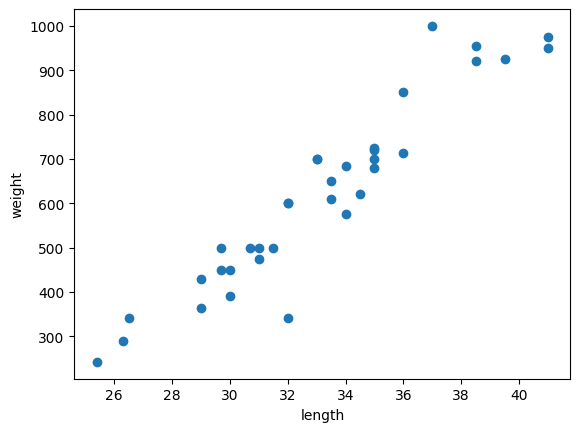

In [55]:
# 파이썬의 과학계산용 그래프를 그리는 대표적인 패키지 "mataplotlib"
# 산점도(scatter plot)로 샘플 데이터의 특성 표현

import matplotlib.pyplot as plt # as 키워드는 약어로만드는 작업 plt가 아니라 원하는 이름으로 써도 된다.

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

빙어 데이터 준비

In [56]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

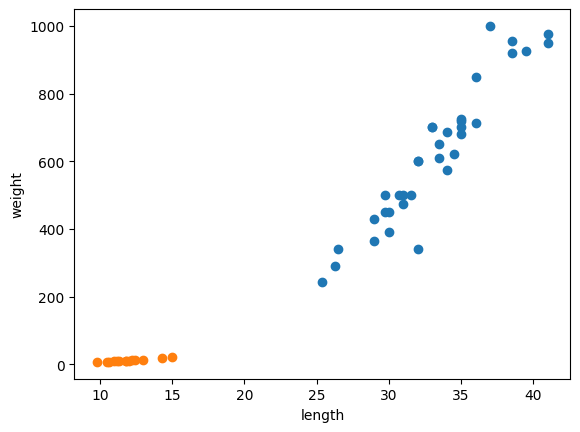

In [57]:
plt.scatter(bream_length, bream_weight) # 코드에서와 같이 scatter함수는 두번 연속으로 호출하게되면 중첩해서 그려준다.
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

첫 번째 머신러닝 프로그램

In [58]:
# 두개의 데이터 샘플을 덧셈 연산자를 통해 합쳐주었다.
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [59]:
# 사이킷런이 기대하는 데이터의 형태로 변환해주어야 한다.
# 2차원 배열로 변환하여 넣어야 사이킷 런이 기대하는 데이터의 형태가 된다. (리스트의 리스트)

fish_data = [[l,w] for l, w in zip(length,weight)] # 리스트 내포 
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


* 정답 준비 = (지도학습
)
머신러닝을 통해 알고리즘이 생선의 길이와 무게를 보고 도미와 빙어를 구분하는 규칙을 찾기를 원할때, 적어도 어떤 생선이 도미인지 빙어인지를 알려 주어야 한다.

In [60]:
fish_target = [1]*35 + [0]*14 # 정답 리스트 생성
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


k-최근점 이웃 알고리즘을 구현한 클래스인 KNeighborsClassifier를 import

In [61]:
# 거의 모든 머신러닝 라이브러리는 이진분류이다. 두개의 클래스를 찾는 분류 
# 도미를 찾고싶다고 하면 도미를 1로 놓고 빙어를 0으로 놓으면된다.

from sklearn.neighbors import KNeighborsClassifier # sklearn.neighbors 라는 모듈안에 KNeighborsClassifier라는 클래스가 있다.
kn = KNeighborsClassifier() # 클래스를 사용할때는 클래스 뒤에 가로를 붙여 클래스의 인스턴스/객체를 만든다.
kn.fit(fish_data,fish_target) # kn 객체에 fit메소드에 전달하여 훈련시키는 것
kn.score(fish_data,fish_target) # score메소드는 훈련의 성과(정확도)를 표시하는 것으로 0~1의 값을 반환


1.0

k-최근접 이웃 알고리즘 (새로운 생선 예측)

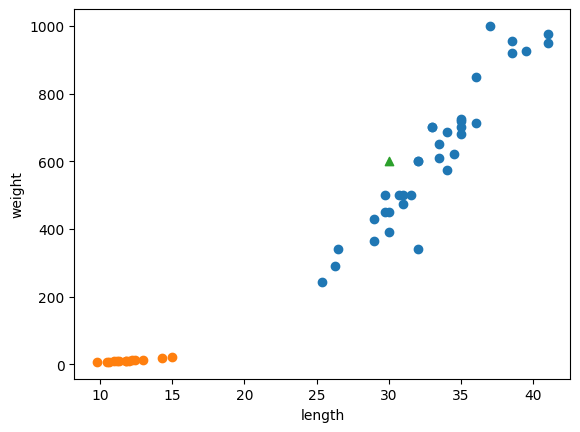

In [62]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30,600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [63]:
kn.predict([[30,600]]) 

# predict() 함수는 입력된 샘플에 대한 예측 결과(클래스 라벨) 을 반환
# array([1])은 예측된 클래스가 1이라는 뜻
# 도미를 1로 앞서 설정했는데 출력값은 보면 1(도미)로 분류(에측)을 한 것이다.
# k-최근접 이웃 알고리즘은 기본값은 5로 주위의 5개의 데이터를 보고 현재의 데이터의 정답을 구분해 낸다.
# k-최근접 이웃은 데이터가 아주 많은 경우 메모리가 많이 필요학 직선거리를 계산하는 데도 많은 시간이 필요하다는 단점이 있다.

array([1])

무조건 도미

In [64]:
print(kn._fit_X)

'''
kn._y란?
_y는 scikit-learn의 KNeighborsClassifier 객체 내부에서
모델이 학습할 때 사용한 훈련 데이터 target를 저장하는 비공개(private) 속성
'''

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


'\nkn._y란?\n_y는 scikit-learn의 KNeighborsClassifier 객체 내부에서\n모델이 학습할 때 사용한 훈련 데이터 target를 저장하는 비공개(private) 속성\n'

In [65]:
print(kn._y)
'''
kn._fit_y란?
_fit_X는 scikit-learn의 KNeighborsClassifier 객체 내부에서
모델이 학습할 때 사용한 훈련 데이터(features) 를 저장하는 비공개(private) 속성
'''

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


'\nkn._fit_y란?\n_fit_X는 scikit-learn의 KNeighborsClassifier 객체 내부에서\n모델이 학습할 때 사용한 훈련 데이터(features) 를 저장하는 비공개(private) 속성\n'

In [66]:
kn49 = KNeighborsClassifier(n_neighbors=49) # k-최근접 이웃의 매개변수를 이용해 설정값을 바꿔준다.
kn49.fit(fish_data, fish_target) # 전체 샘플이 49개이고 49개중 다수가 도미이기 때문에 알고리즘의 예측은 모두 도미로 예측하게 된다.
kn49.score(fish_data, fish_target)

0.7142857142857143

## <02-1. 훈련 세트와 테스트 세트>

In [67]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [68]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [69]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [70]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35] #슬라이싱 여러개의 원소를 한꺼번에 선택가능
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35번째 부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35번째 부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [71]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target) # 정확도 0 으로 테스트 세트에서 아무것도 못맞치게 되었다.

0.0

샘플링 편향

훈련 세트에서는 도미만 테스트 세트에서는 빙어만 들어있었기 때문에 올바르게 나눈 데이터 세트가 아니게 되었다.

넘파이 사용하기

In [72]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)

# predict는 우리가 넣어준 2차원 배열을 다시 넘파이 배열로 바꿔서 predict에 넣는다.
# 넘파이 함수 np.array에 넣어서 호출하면 알아서 넘파이 배열로 바뀌게 된다.
# 리스트와 넘파이 배열과의 구분이 눈으로는 잘 되지않지만 여러 모듈들을 사용시에 유용하게 사용된다.

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


배열을 섞은 후에 나누는 방식 대신에 무작위로 샘플을 고르는 방법을 사용한다. 한가지 주의 할 점은 input_arr와 target_arr 에서 같은 위치는 함께 선택되어야 한다.
이렇게 하려면 훈련 세트와 테스트 세트로 나눌 인덱스 값을 잘 기억해야한다. 항상 인덱스 값을 기억할 수는 없으니 다른 방법이 필요하다. 아예 인덱스를 섞은 다음 input_arr와 target_arr에서 샘플을 선택하면 무작위로 훈련 세트를 나누는 것이 된다.
넘파이 arange() 함수를 사용하면 0에서부터 48까지 1씩 증가하는 인덱스를 간단히 만들 수 있다. 그다음 이 인덱스를 랜덤하게 섞는다. 

In [73]:
np.random.seed(42)
index = np.arange(49) # arange() 함수를 이용해서 0부터 48까지 1씩 증가하는 인덱스를 만들어준다.
np.random.shuffle(index) # 섞어주기
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [74]:
print(input_arr[[1,3]])
'''넘파이는 슬라이싱 외에 배열 인덱싱이란 기능을 제공한다. 배열 인덱싱은 1개의 인덱스가 아닌 여러개의 인덱스로 한번에
여러개의 원소를 선택할 수 있다. '''

[[ 26.3 290. ]
 [ 29.  363. ]]


'넘파이는 슬라이싱 외에 배열 인덱싱이란 기능을 제공한다. 배열 인덱싱은 1개의 인덱스가 아닌 여러개의 인덱스로 한번에\n여러개의 원소를 선택할 수 있다. '

In [75]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [76]:
# 만들어진 index의 첫번째 값은 13이였다. 따라서 train_input의 첫번째 원소는 input_arr의 열네번째 원소가 들어 있을 것이다.
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


테스트 세트 만들기

In [77]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

데이터 나누고 확인하기

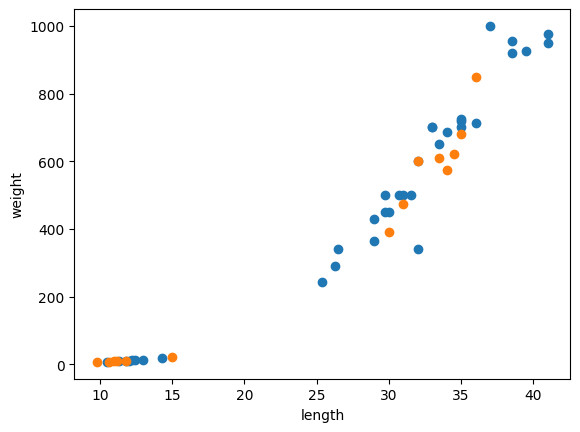

In [78]:
import matplotlib.pyplot as plt

# train_input에서 행은 전체 선택 ":", 첫번째 열 "0"을 선택하였다고 볼 수 있다.
plt.scatter(train_input[:, 0], train_input[:, 1]) # 2차원배열을 나눌떄 ","를 이용해서 행과 열을 사용할 수 있다. 
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

두 번째 머신러닝 프로그램

In [81]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target) # 100% 나옴

1.0